<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/Test/CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

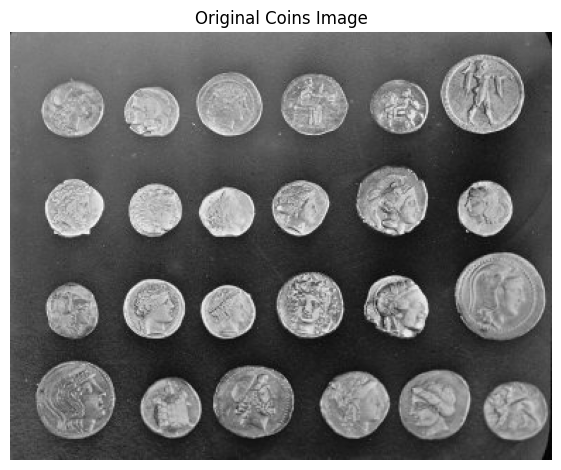

M = 303 columns, N = 384 rows
Pixel grayscale range: [1, 252]


In [5]:
import matplotlib.pyplot as plt
from skimage.data import coins

# Load image
image = coins()
# 'coins' is already grayscale, so we dont need to convert it to grayscale

# Plot original and thresholded images
plt.imshow(image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print('M = {} columns, N = {} rows'.format(*image.shape)) # Print out image size

# Report pixel value range
pixel_min = image.min()
pixel_max = image.max()
print("Pixel grayscale range: [{}, {}]".format(pixel_min, pixel_max))

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

## 3. Applied noise to the image and use the correct function to erase the noise.

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

## 10. Extract the main texture features of this image

## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)